# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

C:\Users\Jennifer\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Jennifer\Anaconda2\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [2]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print 'data shape: ', X.shape
print 'label shape:', Y.shape

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000L, 784L)
label shape: (70000L,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

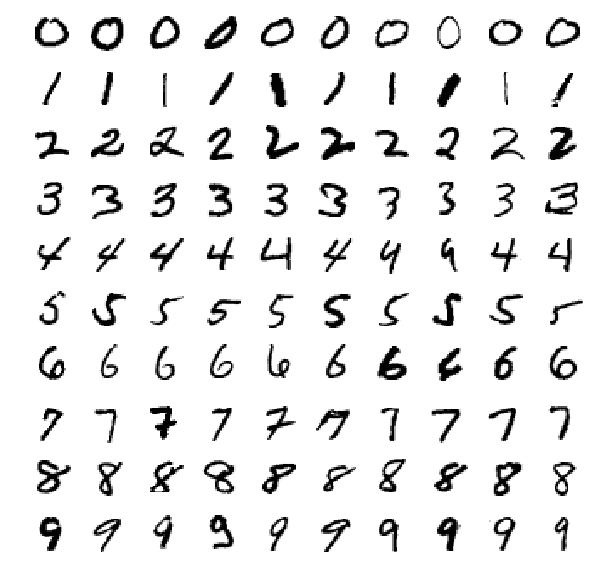

In [103]:
def P1(num_examples=10):#set the number of pics to show for each digit

### STUDENT START ###
    #set the range of digits of interest (ex: 3 for digit 0:2)
    digits = 10

    #Create matrix that holds the position of each digit within the mini_train dataset
    df = []
    for j in range(digits):
        list_digit_index =[] #holds values of position of label
        x=0 #counts the place in the label array
        #iterates over list of all labels, until the correct number of examples is filled
        while len(list_digit_index)<num_examples: 
            #checks to see if the digit is the one we are looking for
            if(mini_train_labels[x]==j): 
                #documents the np location (of the image data) in a list
                list_digit_index.append(x)
            x+=1  #moves on to the next value in the total list of labels
        df.append(list_digit_index) #combines the location data for each digit into 1 place
    #converts list of lists into matrix using np
    df2 = np.array(df)

    #set up flexible grid of images and adjusts the size of the images
    fig, axes = plt.subplots(digits,num_examples,figsize=(10,10))
    #fill in the grid 
    for k in range(digits):
        for i in range(1, num_examples +1):
            #data index location
            position = df2[k,(i-1)]
            #select the data for one image & convert 1D array into 2DMatrix
            image_i_data = np.reshape(mini_train_data[position,], (28, 28))
            #Show the image of the one number and converts the image to black and white
            axes[k,i-1].imshow(image_i_data,cmap='gray_r')
            #remove annoying tick marks on x & y axis
            axes[k,i-1].axis('off')

### STUDENT END ###

P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [5]:
def P2(k_values):

    ### STUDENT START ###
    dev_accuracy = []
    #try out some different k here
    for k in (k_values):
        #builds model
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(mini_train_data, mini_train_labels)
        #makes predictions on the dev dataset with the model we just built
        test_predicted_labels = model.predict(dev_data)

        #accuracy Calcs
        wrong_prediction = (test_predicted_labels != dev_labels)
        print "Hyperparameter k:" + str(k)
        print 'number of incorrect predictions:', np.sum(wrong_prediction)
        accuracy_rate = np.sum((test_predicted_labels == dev_labels))/float(len(dev_labels))*100
        print 'Accuracy Rate ' +  "{0:.1f}%".format(accuracy_rate)

        if k ==1:
            print classification_report(dev_labels,test_predicted_labels)
### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

Hyperparameter k:1
number of incorrect predictions: 112
Accuracy Rate 88.8%
             precision    recall  f1-score   support

        0.0       0.91      0.98      0.94        99
        1.0       0.89      1.00      0.94       105
        2.0       0.99      0.79      0.88       102
        3.0       0.77      0.87      0.82        86
        4.0       0.89      0.82      0.85       104
        5.0       0.93      0.84      0.88        91
        6.0       0.94      0.96      0.95        98
        7.0       0.89      0.92      0.90       113
        8.0       0.94      0.88      0.91        96
        9.0       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000

Hyperparameter k:3
number of incorrect predictions: 122
Accuracy Rate 87.8%
Hyperparameter k:5
number of incorrect predictions: 131
Accuracy Rate 86.9%
Hyperparameter k:7
number of incorrect predictions: 135
Accuracy Rate 86.5%
Hyperparameter k:9
number of incorrect predictions: 137
A

ANSWER: overall digit 9 is the most difficult as shown by the lowest f1 score. Digit 3 the model only recognizes 77% of the time and digit 2 the model thinks its a 2, but its not. 

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [77]:
def P3(train_sizes, accuracies):

### STUDENT START ###
    #store the model run time here
    time_list = []
    #iterate over different train dataset sizes
    for t_size in (train_sizes):
        #subset the train data/labels dataset to the desired level
        idx = np.random.choice(np.arange(len(train_data)), t_size, replace=False)
        sample_train_data = train_data[idx]
        sample_train_labels = train_labels[idx]

        #starts the timer
        start_time = time.time()

        #builds model
        model = KNeighborsClassifier(n_neighbors=1)
        model.fit(sample_train_data, sample_train_labels)
        #makes predictions on the dev dataset with the model we just built
        test_predicted_labels = model.predict(dev_data)

        #ends the timer
        end_time = time.time()

        #accuracy Calcs
        wrong_prediction = (test_predicted_labels != dev_labels)
        print "Training Sample Size:" + str(t_size)
        accuracy_rate = (np.sum((test_predicted_labels == dev_labels))/float(len(dev_labels))*100)
        accuracies.append(accuracy_rate)
        print 'Accuracy Rate '+  "{0:.1f}%".format(accuracy_rate)
        run_time = time.strftime("%H:%M:%S",time.gmtime(end_time - start_time))
        #print run_time
        time_list.append(run_time)

### STUDENT END ###
train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes, accuracies)
print accuracies
print time_list

Training Sample Size:100
Accuracy Rate 69.0%
Training Sample Size:200
Accuracy Rate 79.2%
Training Sample Size:400
Accuracy Rate 81.7%
Training Sample Size:800
Accuracy Rate 88.4%
Training Sample Size:1600
Accuracy Rate 91.1%
Training Sample Size:3200
Accuracy Rate 93.0%
Training Sample Size:6400
Accuracy Rate 93.9%
Training Sample Size:12800
Accuracy Rate 96.4%
Training Sample Size:25000
Accuracy Rate 96.3%
[69.0, 79.200000000000003, 81.699999999999989, 88.400000000000006, 91.100000000000009, 93.0, 93.899999999999991, 96.399999999999991, 96.299999999999997]
['00:00', '00:00', '00:00', '00:00', '00:02', '00:04', '00:08', '00:18', '01:03']


In [15]:
#start_time2 = time.time()
print time.gmtime(start_time2)
print (time.strftime("%M:%S",time.gmtime(start_time2)))

time.struct_time(tm_year=2017, tm_mon=9, tm_mday=24, tm_hour=18, tm_min=11, tm_sec=31, tm_wday=6, tm_yday=267, tm_isdst=0)
11:31


In [81]:
print time.time()

AttributeError: 'list' object has no attribute 'time'

(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

In [101]:
def P4(train_sizes, accuracies):
    
### STUDENT START ###
    #creating/formatting the data
    regression_train_data = np.array(train_sizes).reshape((len(train_sizes),1))
    regression_train_labels = np.array(accuracies) 
    
    #build the regression model
    reg = LinearRegression()
    reg.fit(regression_train_data,regression_train_labels) 

    print 'Prediction with all datapoints and no transformation:'+ str(reg.predict(60000))
    
    #applying transformation to enhance the model
    trans_train_sizes = np.log10(train_sizes)
    trans_accuracies = np.log10(accuracies)
    trans_reg_train_data = np.array(trans_train_sizes).reshape((len(trans_train_sizes),1))
    trans_reg_train_labels = np.array(trans_accuracies) 
    #print trans_reg_train_labels
    
    #build the regression model
    reg2 = LinearRegression()
    reg2.fit(trans_reg_train_data, trans_reg_train_labels) 
    
    #transformed prediction
    trans_pred = reg2.predict(np.log10(60000))
    #print trans_pred
    transformedPred = 10**trans_pred
    
    print 'Prediction with all datapoints and transformation data:' + str(transformedPred)


### STUDENT END ###

P4(train_sizes, accuracies)

Prediction with all datapoints and no transformation:[ 125.02525591]
Prediction with all datapoints and transformation data:[ 106.18722544]


ANSWER: with a sample size of 60k (or all of the training data) the linear model predicts an accuracy of 126%, which is obviously wrong. The effect of adding more data is not linear; there are diminishing returns. From w203, we learned some potential transformations for could include taking the sqrt, taking the log or taking the log log (percent change in x and y). I applied the last technique, loglog and the transformation resulted an improved accuracy rate of 106%, which is still to high, but much closer to the goal of 100%.

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

confusion matrix for KNN model with k=1
[[ 97   0   0   0   0   0   2   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  4   4  81   4   0   0   0   4   3   2]
 [  1   0   0  75   0   3   0   3   1   3]
 [  0   2   0   0  85   0   3   0   0  14]
 [  2   0   0   9   0  76   0   1   1   2]
 [  1   1   1   0   1   0  94   0   0   0]
 [  1   4   0   1   1   0   0 104   0   2]
 [  0   2   0   5   0   2   1   0  84   2]
 [  1   0   0   3   9   1   0   5   0  87]]
Frequency of unique values of the incorrect predictions:
[[  0.   2.   3.   4.   5.   6.   7.   8.   9.]
 [  2.  21.  11.  19.  15.   4.   9.  12.  19.]]


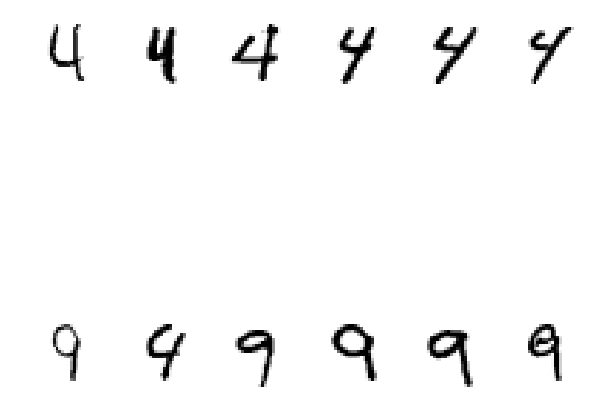

In [152]:
#def P5():

### STUDENT START ###
#builds model
model = KNeighborsClassifier(n_neighbors=1)
model.fit(mini_train_data, mini_train_labels)
#makes predictions on the dev dataset with the model we just built
test_predicted_labels = model.predict(dev_data)

#detailed review of accuracy prediction
solution = confusion_matrix(dev_labels, test_predicted_labels)
print 'confusion matrix for KNN model with k=1' 
print solution
#find examples where the prediction doesn't match the label
ix = (dev_labels != test_predicted_labels)

#filter train/test to just the incorrect predictions
key_train_index = np.where(ix) #finds position
key_dev_data = dev_data[key_train_index] #filters data
key_dev_labels = dev_labels[key_train_index] #filters labels
key_test_pred_labels = test_predicted_labels[key_train_index] #filters predictions

#key digits of interest (most incorrect)
unique_elements, counts_elements = np.unique(key_dev_labels, return_counts=True)
print("Frequency of unique values of the incorrect predictions:")
print(np.asarray((unique_elements, counts_elements)))

#we most often confuse 9's,4's and we are also bad at classifying 2's in general, 
#but those get predicted as a bunch of different things
incorrect_digits_4 = [4,9]
#isolating the data from a few examples that we got wrong
ix = np.isin(key_dev_labels, incorrect_digits) #makes boolean
#filter train/test to just the digits of interest
incorrect_train_index = np.where(ix) #finds position
incorrect_train_data = key_dev_data[incorrect_train_index] #filters data
incorrect_train_labels = key_dev_labels[incorrect_train_index] #filters labels
incorrect_test_predictions = key_test_pred_labels[incorrect_train_index]#filters predictions

#Print some examples
#Create matrix that holds the position of each digit within the incorrect_train_data
df = []
for j in (incorrect_digits):
    list_digit_index =[] #holds values of position of label
    x=0 #counts the place in the label array
    #iterates over list of all labels, until the correct number of examples is filled
    while len(list_digit_index)<6: 
        #checks to see if the digit is the one we are looking for
        if((incorrect_train_labels[x]==j) & ((incorrect_test_predictions[x]==4) or (incorrect_test_predictions[x]==9))): 
            #documents the np location (of the image data) in a list
            list_digit_index.append(x)
        x+=1  #moves on to the next value in the total list of labels
    df.append(list_digit_index) #combines the location data for each digit into 1 place
#converts list of lists into matrix using np
df2 = np.array(df)

#set up flexible grid of images and adjusts the size of the images
fig, axes = plt.subplots(2,6,figsize=(10,10))
#fill in the grid 
for k in (0,1):
    for i in range(1, 6+1):
        #data index location
        position = df2[k,(i-1)]
        #select the data for one image & convert 1D array into 2DMatrix
        image_i_data = np.reshape(incorrect_train_data[position,], (28, 28))#incorrect_train_data[position,]
        #Show the image of the one number and converts the image to black and white
        axes[k,i-1].imshow(image_i_data,cmap='gray_r')
        #remove annoying tick marks on x & y axis
        axes[k,i-1].axis('off')
    
### STUDENT END ###

#P5()

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

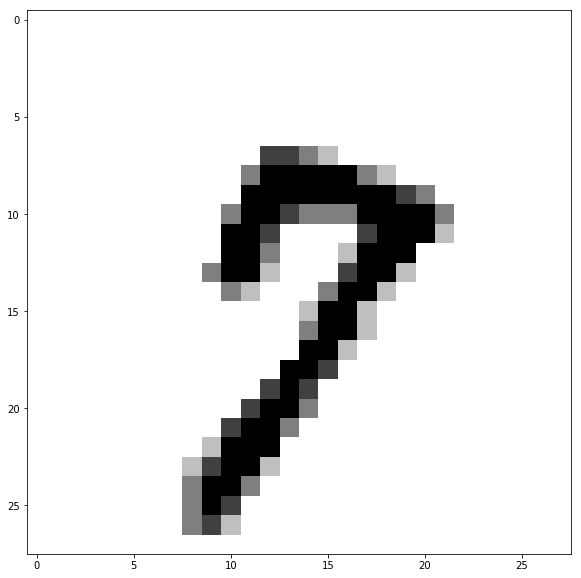

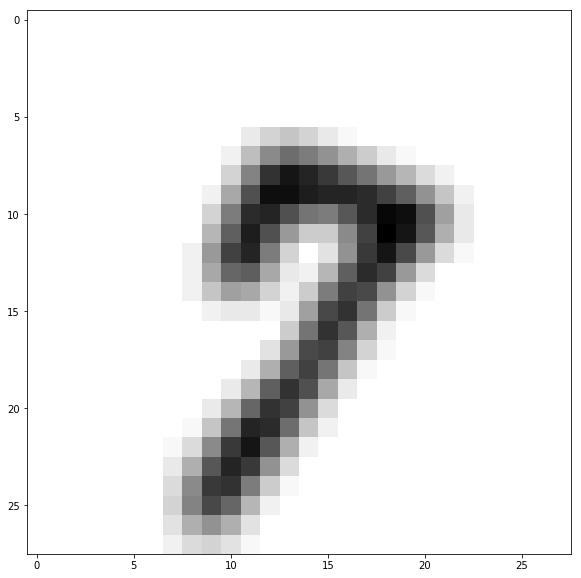

In [80]:
#def P6():
    
### STUDENT START ###
def blur_digit(image_data):
    new_image = []
    pixel_neighbors = []

    #loop through all pixels in the image
    for pixel_x in range(0,28):
        for pixel_y in range(0,28):
            #error handle edges
            if pixel_y >=27:
                pixel_right = pixel_y
            else:
                pixel_right = pixel_y+1
            if pixel_x >=27:
                pixel_skip = pixel_x
            else: 
                pixel_skip = pixel_x +1
            #row above
            neighbor_top= image_i_data[pixel_skip,(pixel_y-1,pixel_y,pixel_right)] 
            pixel_neighbors.append(neighbor_top)
            #current row
            neighbor_same = image_i_data[pixel_x,(pixel_y-1,pixel_y,pixel_right)]
            pixel_neighbors.append(neighbor_same)
            #row below
            neighbor_bottom = image_i_data[pixel_x-1,(pixel_y-1,pixel_y,pixel_right)]
            pixel_neighbors.append(neighbor_bottom)

            #weight old pixel and calc new pixel
            new_pixel = np.mean(pixel_neighbors)
            new_image.append(new_pixel)
            pixel_neighbors = []
    return (new_image)

#train_data, train_labels = X[:60000], Y[:60000]

#apply blur to mini_train
blur_mini_train = []
for digit_pic_cnt in range(0, len(mini_train_data)):
    image_pre_blur = np.reshape(mini_train_data[digit_pic_cnt,], (28, 28))
    post_blur = blur_digit(image_pre_blur)
    blur_mini_train.append(post_blur)

#apply blur to test
blur_test_data = []
for digit_pic_cnt in range(0, len(test_data)):
    image_pre_blur = np.reshape(test_data[digit_pic_cnt,], (28, 28))
    post_blur = blur_digit(image_pre_blur)
    blur_test_data.append(post_blur)

#apply blur to dev
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
blur_test_data = []
for digit_pic_cnt in range(0, len(test_data)):
    image_pre_blur = np.reshape(test_data[digit_pic_cnt,], (28, 28))
    post_blur = blur_digit(image_pre_blur)
    blur_test_data.append(post_blur)

### STUDENT START ###

fig, axes = plt.subplots(1,1,figsize=(10,10))
image_i_data = np.reshape(mini_train_data[4,], (28, 28))
#Show the image of the one number and converts the image to black and white
plt.imshow(image_i_data,cmap='gray_r')


new_image_test = blur_digit(image_i_data)

fig, axes = plt.subplots(1,1,figsize=(10,10))
image_i_data2 = np.reshape(new_image_test, (28, 28))
#Show the image of the one number and converts the image to black and white
plt.imshow(image_i_data2,cmap='gray_r')


### STUDENT END ###

#P6()

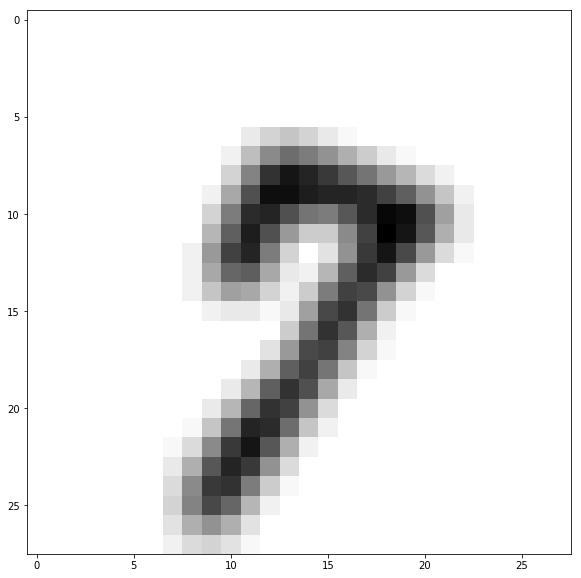

In [87]:
fig, axes = plt.subplots(1,1,figsize=(10,10))
image_i_data = np.reshape(blur_mini_train[1], (28, 28))
#Show the image of the one number and converts the image to black and white
plt.imshow(image_i_data,cmap='gray_r')

In [86]:
blur_mini_train[1]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [81]:
post_blur

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [76]:
[digit_pic_cnt]

[0]

In [ ]:
#builds model
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(mini_train_data, mini_train_labels)
        #makes predictions on the dev dataset with the model we just built
        test_predicted_labels = model.predict(dev_data)

        #accuracy Calcs
        wrong_prediction = (test_predicted_labels != dev_labels)
        print "Hyperparameter k:" + str(k)
        print 'number of incorrect predictions:', np.sum(wrong_prediction)
        accuracy_rate = np.sum((test_predicted_labels == dev_labels))/float(len(dev_labels))*100
        print 'Accuracy Rate ' +  "{0:.1f}%".format(accuracy_rate)


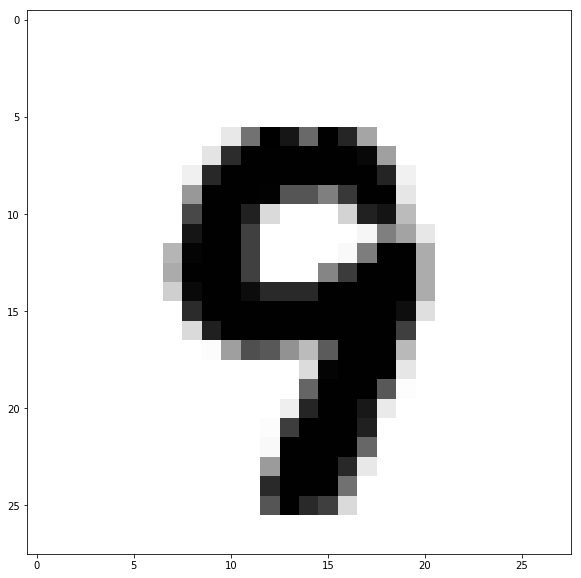

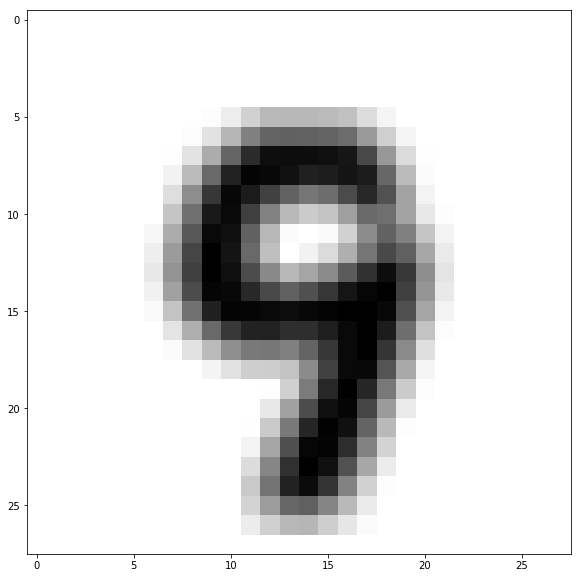

In [58]:
#def P6():
    
### STUDENT START ###
fig, axes = plt.subplots(1,1,figsize=(10,10))
image_i_data = np.reshape(mini_train_data[1,], (28, 28))
#Show the image of the one number and converts the image to black and white
plt.imshow(image_i_data,cmap='gray_r')

def blur_digit(image_i_data)
new_image = []

#loop through all pixels in the image
for pixel_x in range(0,28):
    for pixel_y in range(0,28):
        #error handle edges
        if pixel_y >=27:
            pixel_right = pixel_y
        else:
            pixel_right = pixel_y+1
        if pixel_x >=27:
            pixel_skip = pixel_x
        else: 
            pixel_skip = pixel_x +1
        #row above
        neighbor_top= image_i_data[pixel_skip,(pixel_y-1,pixel_y,pixel_right)] 
        pixel_neighbors.append(neighbor_top)
        #current row
        neighbor_same = image_i_data[pixel_x,(pixel_y-1,pixel_y,pixel_right)]
        pixel_neighbors.append(neighbor_same)
        #row below
        neighbor_bottom = image_i_data[pixel_x-1,(pixel_y-1,pixel_y,pixel_right)]
        pixel_neighbors.append(neighbor_bottom)

        #weight old pixel and calc new pixel
        new_pixel = np.mean(pixel_neighbors)
        new_image.append(new_pixel)
        pixel_neighbors = []
return (new_image)
        
### STUDENT START ###
fig, axes = plt.subplots(1,1,figsize=(10,10))
image_i_data2 = np.reshape(new_image, (28, 28))
#Show the image of the one number and converts the image to black and white
plt.imshow(image_i_data2,cmap='gray_r')


### STUDENT END ###

#P6()

ANSWER:

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [11]:
#def P7():

### STUDENT START ###


    
### STUDENT END ###

#P7()

ANSWER:

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [12]:
#def P8(alphas):

### STUDENT START ###



### STUDENT END ###

#alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
#nb = P8(alphas)

In [14]:
#print nb.best_params_

ANSWER:

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [15]:
#def P9():

### STUDENT END ###


### STUDENT END ###

#gnb = P9()

ANSWER:

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

In [16]:
#def P10(num_examples):

### STUDENT START ###


### STUDENT END ###

#P10(20)

ANSWER:

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [17]:
#def P11(buckets, correct, total):
    
### STUDENT START ###


                
### STUDENT END ###

#buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
#correct = [0 for i in buckets]
#total = [0 for i in buckets]

#P11(buckets, correct, total)

#for i in range(len(buckets)):
#    accuracy = 0.0
#    if (total[i] > 0): accuracy = correct[i] / total[i]
#    print 'p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy)

ANSWER:

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [18]:
#def P12():

### STUDENT START ###


### STUDENT END ###

#P12()